<a href="https://colab.research.google.com/github/Rosemy7/heartdisease/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ristiyana Apriliyani Ramdani

Kompi 2

# ASSIGNMENT CHAPTER 2: DATA PREPROCESSING

Data Set : https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

Descriptions:
* age: Age of the patient.
* sex: Gender of the patient (1=male, 0=female).
* chest pain type (cp): Categorized into 4 values.
* resting blood pressure (trestbps): The patient's resting blood pressure.
* serum cholesterol (chol): The level of cholesterol in the blood, measured in milligrams per deciliter (mg/dl).
* fasting blood sugar (fbs): Binary indicator (1 if fasting blood sugar > 120 mg/dl, 0 otherwise).
* resting electrocardiographic results (restecg): Categorized into values 0, 1, 2.
* maximum heart rate achieved (thalach): The highest heart rate during exercise.
* exercise-induced angina (exang): Binary indicator for exercise-induced angina.
* oldpeak: ST depression induced by exercise relative to rest.
* slope: The slope of the peak exercise ST segment.
*number of major vessels colored by fluoroscopy (ca): Ranges from 0 to 3.
* thal: Categorized as 0 = normal, 1 = fixed defect, 2 = reversible defect.

The target field indicates the presence of heart disease in the patient, with integer values: 0 = no disease, 1 = disease.




In [ ]:
#Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mstats

## Data Preparation

In [ ]:
#data set
df = pd.read_csv('/content/drive/MyDrive/Startup Campus/Tugas/heart.csv')

In [ ]:
#menampilkan dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


**MISSING VALUE** : Mencari missing value dan mengatasi masalah missing value jika ada.


---



In [ ]:
#data set
df = pd.read_csv('/content/drive/MyDrive/Startup Campus/Tugas/heart.csv')

In [ ]:
#mencari missing value
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Hasilnya nol untuk setiap kolom, ini berarti tidak ada missing Value dalam kolom terserbut, jika hasilnya bukan nol menunjukkan jumlah yang hilang dalam kolom tersebut

selain cara di atas bisa menggunakan cara dibawah ini

In [ ]:
#memberikan info ringkat tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Jumlah non-null untuk setiap kolom sama dengan jumlah baris , yang artinya tidak ada missing value dalam Dataframe

**DUPLICATE VALUE : Mencari duplicate value dan menyelesaikan masalah duplicate value jika ada.**



---



In [ ]:
is_duplicate = df.duplicated().any()

#periksa duplicate, jika ada tampilkan
if is_duplicate:
  print('Terdapat duplicate di dataset')
else:
  print('Tidak terdapat duplicate di dataset')

Terdapat duplicate di dataset


In [ ]:
df #menampilkan data sebelum duplicate

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df.drop_duplicates(inplace=True) #menghilangkan duplicate

In [ ]:
df_clean = df.drop_duplicates() #menyimpan dataset yang sudah di hapus duplicate

In [ ]:
df #periksa kembali ada duplicate atau tidak

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
print(df.duplicated().sum())

0


**OUTLIER** : Memeriksa outlier dan menangani outlier jika ada


---



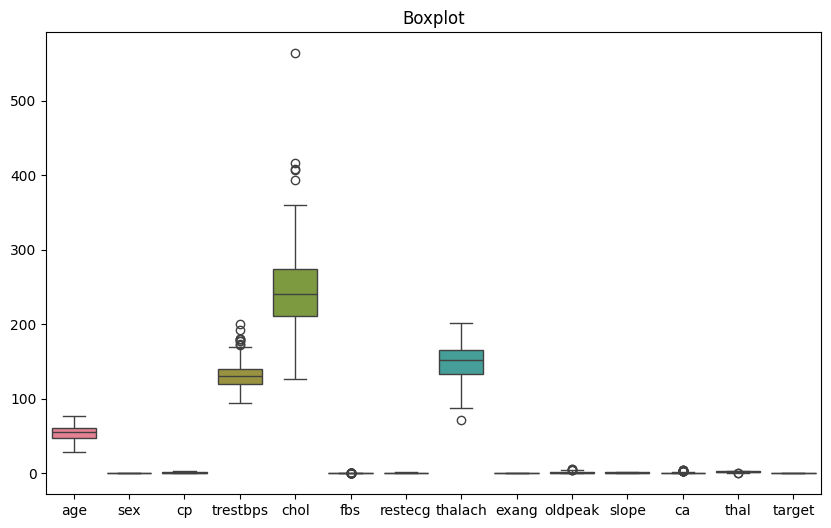

In [ ]:
#memeriksan kolom mana saja yang terdapat outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot')
plt.show()

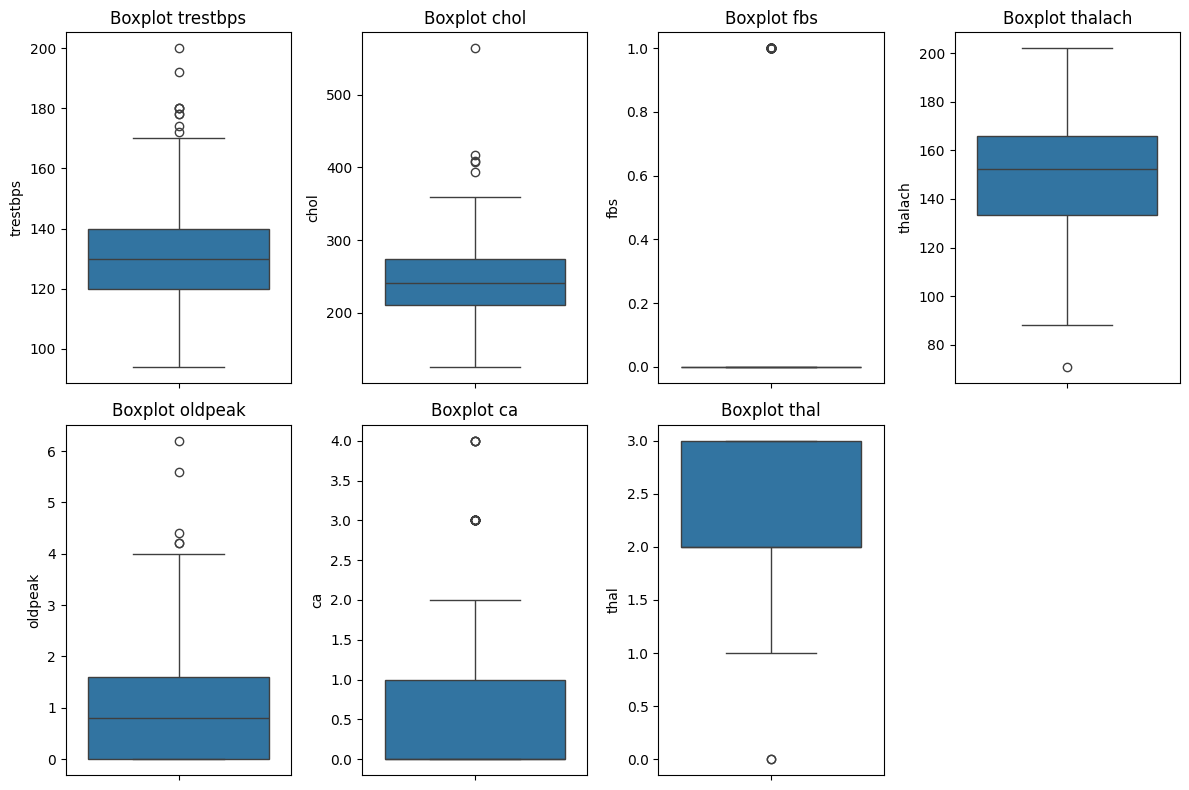

In [ ]:
#memisahkan kolom yang ada outlier
kolom_outlier = ['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']
plt.figure(figsize=(12, 8))
for i, kolom in enumerate(kolom_outlier, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[kolom], orient='v')
    plt.title('Boxplot ' + kolom)
    plt.ylabel(kolom)
plt.tight_layout()

In [ ]:
# Kolom yang memiliki outlier
kolom_outlier = ['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']

* Mengatasi Outlier dengan imputasi nilai

 Imputasi adalah proses mengganti nilai outlier dengan nilai yang dianggap lebih sesuai atau mewakili distribusi data. Ini bisa dilakukan dengan menggunakan nilai tengah (median), mean, atau nilai lain yang cocok untuk setiap kolom atau kelompok data.

 pada kali ini akan menggunakan nilai median

In [ ]:
# Looping untuk menangani outlier pada setiap kolom
for kolom in kolom_outlier:
    # Hitung nilai median kolom
    median_value = df[kolom].median()

    # Tentukan batas atas dan batas bawah
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi outlier
    outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)]

    # Ganti nilai outlier dengan median
    df.loc[outliers.index, kolom] = median_value

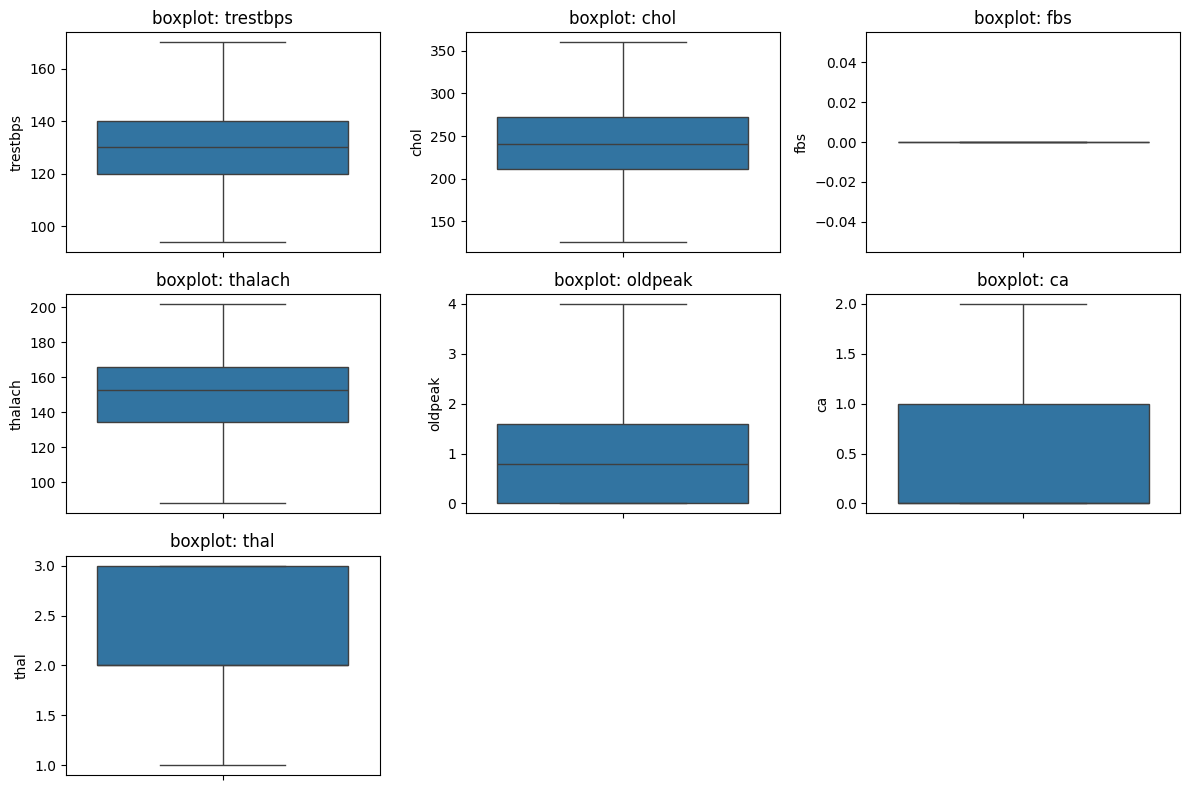

In [ ]:
#menampilkan visualisasi boxplot yang outlier nya sudah sudah di atas oleh imputasi nilai
plt.figure(figsize=(12, 8))
for i, kolom in enumerate(kolom_outlier):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[kolom])
    plt.title('boxplot: ' + kolom)
plt.tight_layout()
plt.show()

* Mengatasi Outlier dengan metode winsorization

  Metode Winsorization lebih fokus pada penggantian nilai outlier dengan nilai yang berada di batas atas atau batas bawah dari distribusi data, bukan menghapusnya sepenuhnya.


In [ ]:
# Melakukan Winsorization untuk setiap kolom yang memiliki outlier
df_winsorized = df.copy()  # Copy dataframe untuk menghindari perubahan inplace
for kolom in kolom_outlier:
    kolom_winsorized = kolom + '_winsorized'
    df_winsorized[kolom_winsorized] = mstats.winsorize(df_winsorized[kolom], limits=[0.05, 0.05])

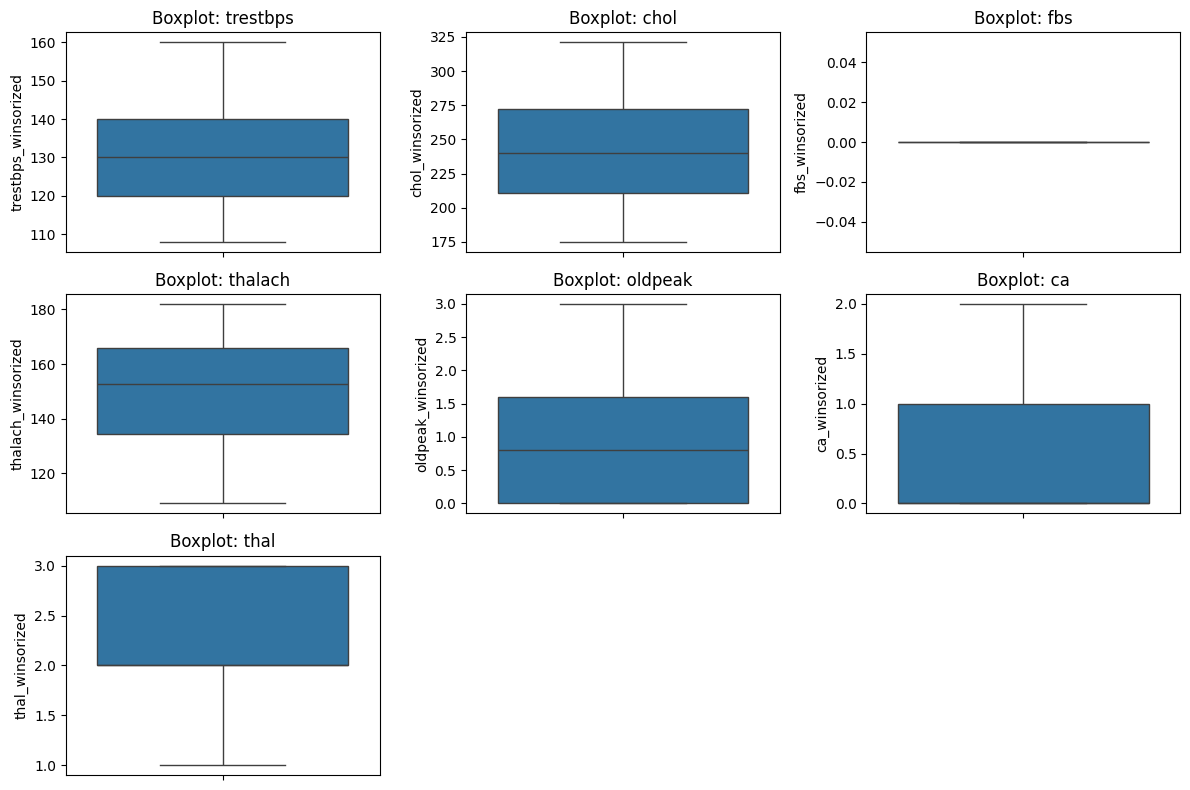

In [ ]:
#Menampilkan visualisasi boxplot yang sudah di atas outlier nya oleh metode winsorization
plt.figure(figsize=(12, 8))
for i, kolom in enumerate(kolom_outlier):
    kolom_winsorized = kolom + '_winsorized'
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df_winsorized[kolom_winsorized])
    plt.title('Boxplot: ' + kolom)
plt.tight_layout()

**IMBALANCE DATA** : Memeriksa imbalance data dan menyelesaikan masalah imbalance data jika ada.



---



<ipython-input-22-c5801357445c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette=['maroon','firebrick'])


Text(0.5, 1.0, 'Imbalance Data')

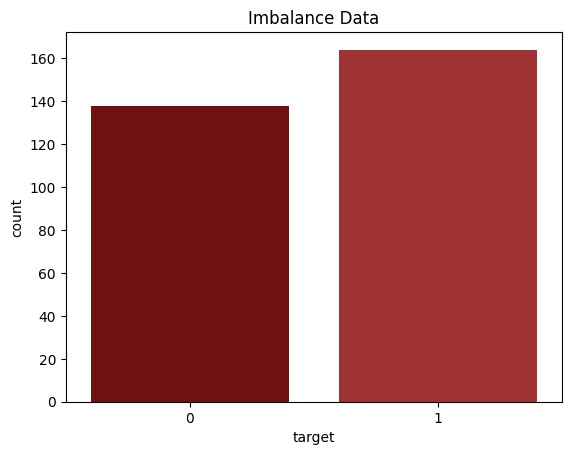

In [ ]:
sns.countplot(x='target', data=df, palette=['maroon','firebrick'])
plt.title('Imbalance Data')

In [ ]:
class_counts = df['target'].value_counts()
class_counts

target
1    164
0    138
Name: count, dtype: int64

In [ ]:
imbalance_ratio = class_counts.max()/class_counts.min()
imbalance_ratio

1.1884057971014492

In [ ]:
# Jika rasio ketidakseimbangan secara signifikan lebih besar dari 1, maka data tidak seimbang
if imbalance_ratio > 1.5:
  print("Data tidak seimbang")
else:
  print("Data seimbang")

Data seimbang


**FEATURE ENCODING** : Melakukan feature encoding jika diperlukan.

---



In [ ]:
#One-hot Encoding pada beberapa kolom
df_encoded = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg'])

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        302 non-null    int64  
 1   trestbps   302 non-null    int64  
 2   chol       302 non-null    float64
 3   thalach    302 non-null    float64
 4   exang      302 non-null    int64  
 5   oldpeak    302 non-null    float64
 6   slope      302 non-null    int64  
 7   ca         302 non-null    int64  
 8   thal       302 non-null    int64  
 9   target     302 non-null    int64  
 10  sex_0      302 non-null    bool   
 11  sex_1      302 non-null    bool   
 12  cp_0       302 non-null    bool   
 13  cp_1       302 non-null    bool   
 14  cp_2       302 non-null    bool   
 15  cp_3       302 non-null    bool   
 16  fbs_0      302 non-null    bool   
 17  restecg_0  302 non-null    bool   
 18  restecg_1  302 non-null    bool   
 19  restecg_2  302 non-null    bool   
dtypes: bool(10), fl

## Exploratory Data Analysis (EDA)

menggunakan dataset yang sama, Peserta diminta untuk

* Mengelaborasi features dan tipe data (nominal,
ordinal, numerical)
* Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus
* Menemukan dan mendeskripsikan statistical five summaries
* Mendeskripsikan distribusi data

Mengelaborasi features dan tipe data (nominal, ordinal, numerical)


---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    float64
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    float64
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 43.5 KB


In [ ]:
# Inisialisasi
nominal_features = []
ordinal_features = []
numerical_features = []

# Loop melalui setiap kolom dalam dataset
for column in df.columns:
    # Periksa jumlah nilai unik dalam kolom
    unique_count = df[column].nunique()

    # Mengklasifikasi kolom
    if unique_count <= 10:
        if unique_count <= 2:  # Jika jumlah nilai unik <= 2, bisa jadi binary atau nominal
            nominal_features.append(column)
        else:  # Jika jumlah nilai unik > 2 dan <= 10, itu bisa jadi ordinal atau nominal
            ordinal_features.append(column)
    else:
        numerical_features.append(column)


In [ ]:
nominal_features

['sex', 'fbs', 'exang', 'target']


1. **Nominal**: merupakan tipe daya yang mewakili kategori atau label tanpa adanya urutan atau tingkatan tertentu,  Dalam dataset ini, beberapa fitur yang termasuk dalam kategori ini adalah:
   
   -`sex`
   
   -`fbs`
   
   -`exang`

   -`target`
   
 Contohnya, dalam fitur 'sex', nilai 0 mewakili perempuan dan nilai 1 mewakili laki-laki. Namun, tidak ada urutan atau tingkatan yang berlaku di antara kategori tersebut.



In [ ]:
ordinal_features

['cp', 'restecg', 'slope', 'ca', 'thal']

2. **Ordinal**: memiliki kategori yang memiliki urutan atau tingkat. Beberapa contoh fitur dalam kategori ini adalah:
    
    -`cp`
    
    -`restecg`
    
    -`slope`
    
    -`thal`
    
    Misalnya, dalam fitur 'cp' (jenis nyeri dada), nilai 0 mungkin menunjukkan nyeri dada tanpa gejala, sementara nilai 3 mungkin menunjukkan nyeri dada dengan gejala yang parah.


In [ ]:
numerical_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

3. **Numerical**: yang berisi nilai-nilai yang dapat diukur. Beberapa contoh fitur dalam kategori ini adalah:
    
    -`age` :
    
    -`trestbps`:

    -`chol`:  
    
    -`thalach`:  
    
    -`oldpeak`:  
    
    -`ca`:

   Contohnya, 'age' mewakili usia pasien yang dapat berupa angka kontinu seperti 30, 40, 50, dan seterusnya.



Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus


---





In [ ]:
#ringkasan statistik
summary_stats = df.describe()

In [ ]:
#menampilkan mean, medain, dan modus
mean_values = df.mean()
median_values = df.median()
mode_values = df.mode().iloc[0] #ambil nilai mode dari setiap kolom

In [ ]:
summary_stats

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.0,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,130.066225,243.226821,0.0,0.526490,149.839404,0.327815,0.974834,1.397351,0.466887,2.327815,0.543046
std,9.04797,0.466426,1.032044,15.148509,44.622846,0.0,0.526027,22.450348,0.470196,1.041288,0.616274,0.708676,0.583683,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.0,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.250000,0.0,1.000000,152.750000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,272.500000,0.0,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.000000,3.000000,1.000000


In [ ]:
df.mean()

age          54.420530
sex           0.682119
cp            0.963576
trestbps    130.066225
chol        243.226821
fbs           0.000000
restecg       0.526490
thalach     149.839404
exang         0.327815
oldpeak       0.974834
slope         1.397351
ca            0.466887
thal          2.327815
target        0.543046
dtype: float64


1. **Mean (Rata-rata)**: Mean adalah nilai rata-rata dari sekumpulan data.
   - Dihitung dengan menjumlahkan semua nilai dalam dataset dan kemudian membaginya dengan jumlah total data.
   - Sangat sensitif terhadap outlier karena mempertimbangkan setiap titik data dalam perhitungannya.
   

In [ ]:
df.median()

age          55.50
sex           1.00
cp            1.00
trestbps    130.00
chol        240.25
fbs           0.00
restecg       1.00
thalach     152.75
exang         0.00
oldpeak       0.80
slope         1.00
ca            0.00
thal          2.00
target        1.00
dtype: float64

In [ ]:
df.mode()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,58.0,1.0,0.0,130.0,197.0,0.0,1.0,162.0,0.0,0.0,2.0,0.0,2.0,1.0
1,NaN,NaN,NaN,NaN,204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,234.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



3. **Modus**: Modus adalah nilai yang paling sering muncul dalam sebuah distribusi data.
   - Distribusi data bisa memiliki satu modus (unimodal), dua modus (bimodal), atau lebih (multimodal).
   - Digunakan untuk menentukan nilai yang paling umum atau sering terjadi dalam dataset.




Menemukan dan mendeskripsikan statistical five summaries


---



In [ ]:
five_summaries = df.describe().style.background_gradient(cmap='PuBuGn')

In [ ]:
five_summaries

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.420530,0.682119,0.963576,130.066225,243.226821,0.000000,0.526490,149.839404,0.327815,0.974834,1.397351,0.466887,2.327815,0.543046
std,9.047970,0.466426,1.032044,15.148509,44.622846,0.000000,0.526027,22.450348,0.470196,1.041288,0.616274,0.708676,0.583683,0.498970
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.500000,1.000000,1.000000,130.000000,240.250000,0.000000,1.000000,152.750000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,272.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,0.000000,2.000000,202.000000,1.000000,4.000000,2.000000,2.000000,3.000000,1.000000


Statistical five summaries adalah ringkasan statistik yang mencakup lima nilai utama dari distribusi data. Kelima nilai ini adalah:

- Mean (Rata-rata): Nilai ini adalah jumlah dari semua data dibagi oleh jumlah data.

- Median: Nilai tengah dari data saat data diurutkan secara berurutan.

- Mode (Modus): Nilai yang paling sering muncul dalam dataset.
- Minimum: Nilai terkecil dalam dataset.
- Maximum: Nilai terbesar dalam dataset.

Mendeskripsikan distribusi data



---




In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.0,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,130.066225,243.226821,0.0,0.526490,149.839404,0.327815,0.974834,1.397351,0.466887,2.327815,0.543046
std,9.04797,0.466426,1.032044,15.148509,44.622846,0.0,0.526027,22.450348,0.470196,1.041288,0.616274,0.708676,0.583683,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.0,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.250000,0.0,1.000000,152.750000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,272.500000,0.0,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.000000,3.000000,1.000000


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

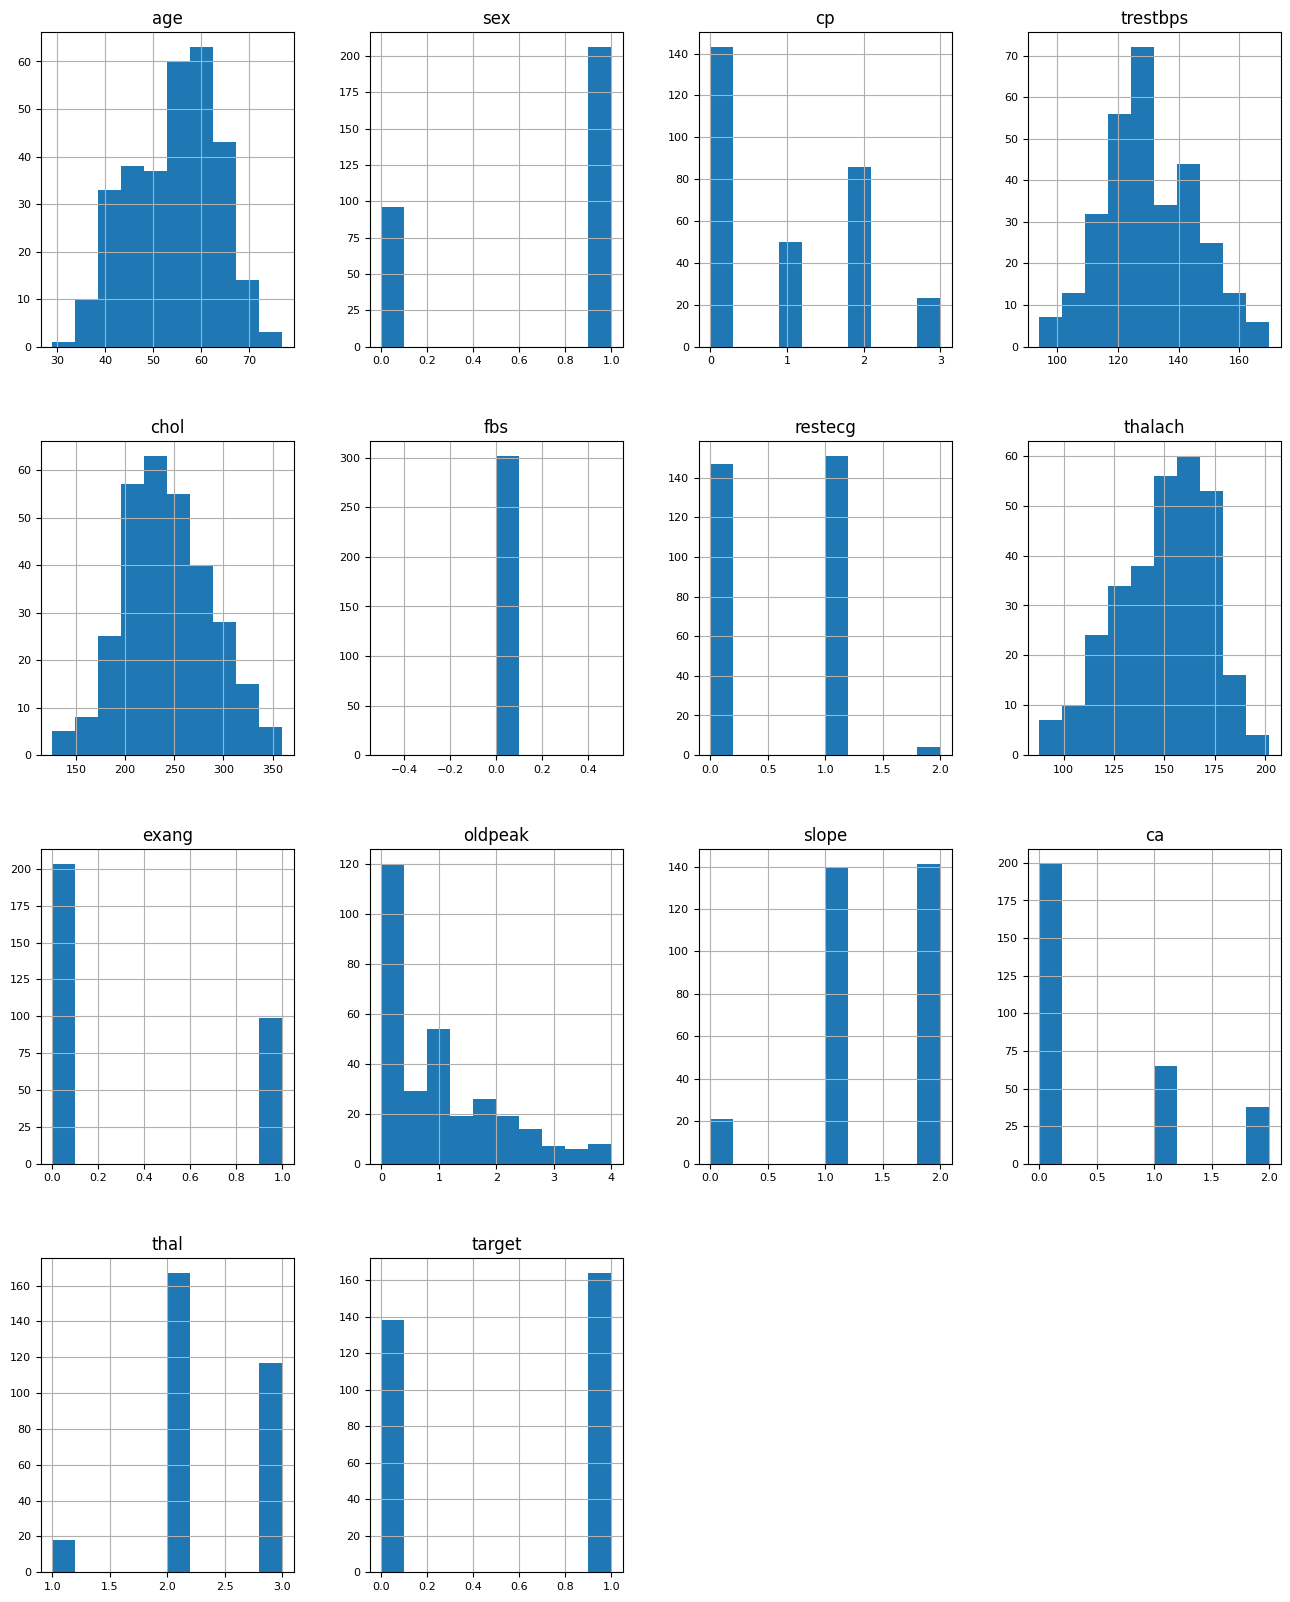

In [ ]:
#histogram data
df.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

Text(17.31944444444445, 0.5, 'Frequency')

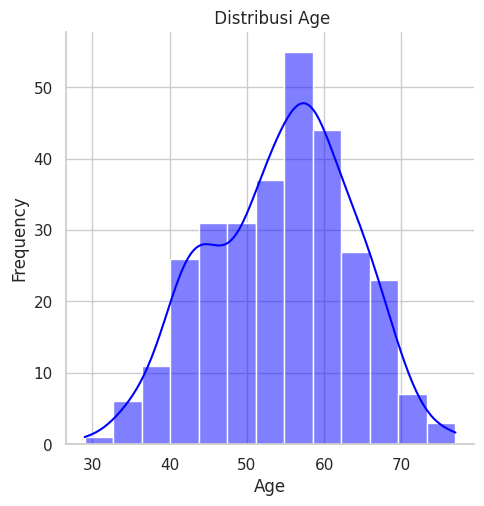

In [ ]:
#histogram untuk kolom numerik
sns.set(style = "whitegrid")
sns.displot(df['age'], kde=True, color='blue')
plt.title(' Distribusi Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Rata-rata usia pasien adalah sekitar 54 tahun.
Usia termuda dalam dataset adalah 29 tahun, dan yang tertua adalah 77 tahun.

Text(0.5, 0, 'Column')

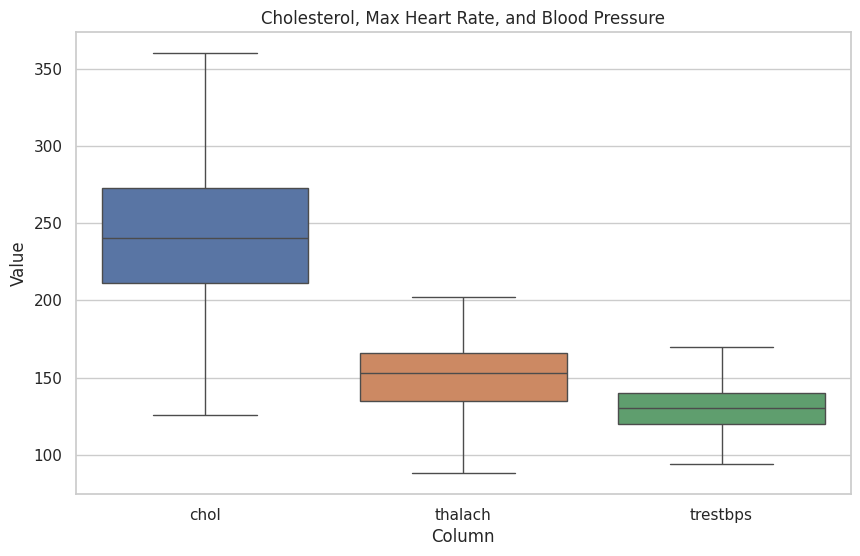

In [ ]:
# Boxplot untuk kolom numerik
plt.figure(figsize=(10, 6))
sns.boxplot(df[["chol", "thalach", "trestbps"]])
plt.title("Cholesterol, Max Heart Rate, and Blood Pressure")
plt.ylabel("Value")
plt.xlabel("Column")

1. Cholesterol:
Rata-rata kolesterol adalah sekitar 246 mg/dL.
Kolesterol berkisar antara 126 mg/dL hingga 564 mg/dL.

2. Max Heart Rate, thalach:
Rata-rata denyut jantung maksimum adalah sekitar 149 bpm. Denyut jantung maksimum berkisar antara 71 bpm hingga 202 bpm.

3. Resting Blood Pressure, trestbps: Rata-rata tekanan darah adalah sekitar 131 mm Hg.
tekanan darah berkisar antara 94 mm Hg hingga 200 mm Hg.

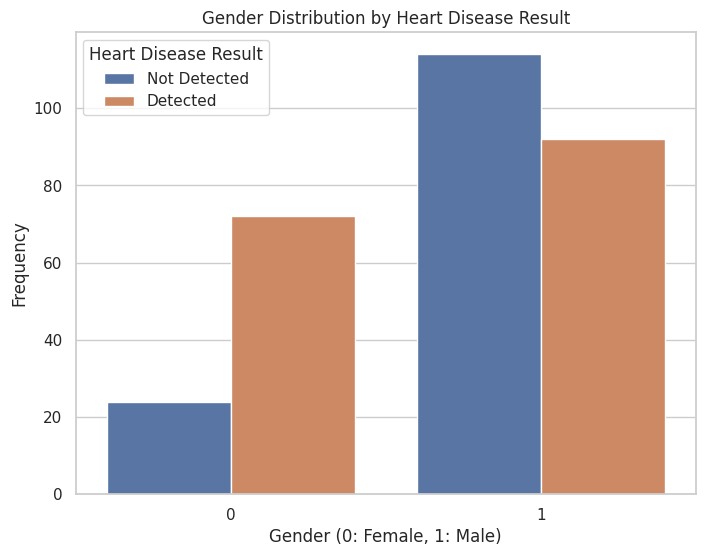

In [ ]:
# Jumlah plot untuk kolom categorical
plt.figure(figsize=(8, 6))
sns.countplot(df, x="sex", hue="target")
plt.title("Gender Distribution by Heart Disease Result")
plt.xlabel("Gender (0: Female, 1: Male)")
plt.ylabel("Frequency")
plt.legend(title="Heart Disease Result", labels=["Not Detected", "Detected"])

Jenis Kelamin (0: Wanita, 1: Pria):

- Terdapat lebih banyak data dari pria (nilai 1) daripada wanita (nilai 0).
- Dalam kelompok pria, jumlah yang terdeteksi mengalami masalah jantung lebih tinggi daripada yang tidak terdeteksi.
- Dalam kelompok wanita, jumlah yang terdeteksi juga lebih tinggi daripada yang tidak terdeteksi.

## Fiture Engineering

Menggunakan dataset yang sama, Peserta diminta untuk dapat membuat minimal 10 fitur baru yang relevan dan signifikan untuk dapat membantu membuat langkah preventif untuk mengurangi dampak dari heart disease tersebut.

Fiture 1. Kelompok Usia (age_group):


cara yang digunakan dalam fiture 'age_group' yaitu menggunakan fungsi pd.cut() dari library pandas Python. Fungsi ini untuk memotong (cut) nilai-nilai dalam rentang tertentu dan menetapkan label sesuai dengan kategori yang telah ditentukan.

* `age`, kolom yang berisi usia pasien
* `bins= [27, 45, 60, 100]` adalah batas rentang usia yang digunakan untuk membagi usia dalam kategori/kelompok muda, dewasa, lanjut usia
* `labels=['nuda','dewasa','lanjut usia']`, merupakan label yang diberikan kepada setiap kategori yang di hasilkan.

In [ ]:
#cara pengelompokan usia
df['age_group'] = pd.cut(df['age'], bins=[27, 45, 60, 100], labels=['muda', 'dewasa', 'lanjut usia'])

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,52,1,0,125,212.0,0,1,168.0,0,1.0,2,2,3,0,dewasa
1,53,1,0,140,203.0,0,0,155.0,1,3.1,0,0,3,0,dewasa
2,70,1,0,145,174.0,0,1,125.0,1,2.6,0,0,3,0,lanjut usia
3,61,1,0,148,203.0,0,1,161.0,0,0.0,2,1,3,0,lanjut usia
4,62,0,0,138,294.0,0,1,106.0,0,1.9,1,0,2,0,lanjut usia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211.0,0,0,115.0,0,1.5,1,0,2,1,lanjut usia
733,44,0,2,108,141.0,0,1,175.0,0,0.6,1,0,2,1,muda
739,52,1,0,128,255.0,0,1,161.0,1,0.0,2,1,3,0,dewasa
843,59,1,3,160,273.0,0,0,125.0,0,0.0,2,0,2,0,dewasa


Pengelompokan usia pasien penting karena usai dapat memengaruhi risiko penyakit jantung. hal ini dapat membantu dalam analisis terhadap data, termasuk dalam evaluasi risiko penyakit jantung terhadap kelompok usia. langkah preventif yang dapat dilakukan seperti mendorong gaya hidup sehat dan penilaian risiko secara berkala pada setiap kelompok usia


---



Fiture 2. Age_time_chol


cara yang digunakan adalah dengan mengkalikan usai pasien dengan tingkat kolestrol


In [ ]:
df['age_times_chol'] = df['age'] * df['chol']

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,age_times_chol
0,52,1,0,125,212.0,0,1,168.0,0,1.0,2,2,3,0,dewasa,11024.0
1,53,1,0,140,203.0,0,0,155.0,1,3.1,0,0,3,0,dewasa,10759.0
2,70,1,0,145,174.0,0,1,125.0,1,2.6,0,0,3,0,lanjut usia,12180.0
3,61,1,0,148,203.0,0,1,161.0,0,0.0,2,1,3,0,lanjut usia,12383.0
4,62,0,0,138,294.0,0,1,106.0,0,1.9,1,0,2,0,lanjut usia,18228.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211.0,0,0,115.0,0,1.5,1,0,2,1,lanjut usia,14348.0
733,44,0,2,108,141.0,0,1,175.0,0,0.6,1,0,2,1,muda,6204.0
739,52,1,0,128,255.0,0,1,161.0,1,0.0,2,1,3,0,dewasa,13260.0
843,59,1,3,160,273.0,0,0,125.0,0,0.0,2,0,2,0,dewasa,16107.0


menggabukan infromasi antara usia (age) dengan tingkat kolesterol (chol), kita dapat menggambarkan keterkaitan antara kedua faktor ini secara langsung. Dengan mengalikan keduanya bersama-sama, kita dapat membuat fitur baru yang menggabungkan informasi dari kedua faktor ini. Ini dapat membantu dalam mengevaluasi risiko penyakit jantung secara lebih holistik.


---




Fiture 3. Membuat Fiture chol_ratio

Cara yang digunakan  dalam membuat fiture chol_ratio adalah dengan membagi antara tekanan darah istirahat (trestbps) dengan kolestrol (chol) dengan menambahkan sebuah konstanta

In [ ]:
#fiture chol_ratio
constant = 5
df['chol_ratio'] = (df['trestbps'] + constant) / df['chol']

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,age_times_chol,chol_ratio
0,52,1,0,125,212.0,0,1,168.0,0,1.0,2,2,3,0,dewasa,11024.0,0.613208
1,53,1,0,140,203.0,0,0,155.0,1,3.1,0,0,3,0,dewasa,10759.0,0.714286
2,70,1,0,145,174.0,0,1,125.0,1,2.6,0,0,3,0,lanjut usia,12180.0,0.862069
3,61,1,0,148,203.0,0,1,161.0,0,0.0,2,1,3,0,lanjut usia,12383.0,0.753695
4,62,0,0,138,294.0,0,1,106.0,0,1.9,1,0,2,0,lanjut usia,18228.0,0.486395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211.0,0,0,115.0,0,1.5,1,0,2,1,lanjut usia,14348.0,0.592417
733,44,0,2,108,141.0,0,1,175.0,0,0.6,1,0,2,1,muda,6204.0,0.801418
739,52,1,0,128,255.0,0,1,161.0,1,0.0,2,1,3,0,dewasa,13260.0,0.521569
843,59,1,3,160,273.0,0,0,125.0,0,0.0,2,0,2,0,dewasa,16107.0,0.604396


fitur ini diperuntukan untuk memberikan informasi tambahan mengenai rasio tekanan darah dan kolesterol, bila keduanya tinggi kemungkinan memiliki risiko yang lebih tinggi terhadap penyakit jantung. Dengan memasukkan fitur 'chol_ratio', dapat mengidentifikasi kelompok-kelompok dengan risiko yang lebih tinggi dan memberikan perhatian khusus pada upaya pencegahan.

penambahan konstanta pada tretbsps sebelum pembagian dengan kolestrol dapa memberikan flesibilitas dalm menghitung rasio antara kedua faktor ini dnegan mempertimbahkan faktor tambahan


---



Fiture 4. Rasio Denyut Jantung (hr_rate_ratio)

cara yang digunakan dalam fiture `heart_rate_ratio` yaitu dengan membagi `thalach` dengan `trestbls`, kemudian menambahkannya ke dalam kolom baru `heart_rate_ratio` ke dataframe.


In [ ]:
# Rasio Denyut Jantung
df['heart_rate_ratio'] = df['thalach'] / df['trestbps']

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,age_times_chol,chol_ratio,heart_rate_ratio
0,52,1,0,125,212.0,0,1,168.0,0,1.0,2,2,3,0,dewasa,11024.0,0.613208,1.344000
1,53,1,0,140,203.0,0,0,155.0,1,3.1,0,0,3,0,dewasa,10759.0,0.714286,1.107143
2,70,1,0,145,174.0,0,1,125.0,1,2.6,0,0,3,0,lanjut usia,12180.0,0.862069,0.862069
3,61,1,0,148,203.0,0,1,161.0,0,0.0,2,1,3,0,lanjut usia,12383.0,0.753695,1.087838
4,62,0,0,138,294.0,0,1,106.0,0,1.9,1,0,2,0,lanjut usia,18228.0,0.486395,0.768116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211.0,0,0,115.0,0,1.5,1,0,2,1,lanjut usia,14348.0,0.592417,0.958333
733,44,0,2,108,141.0,0,1,175.0,0,0.6,1,0,2,1,muda,6204.0,0.801418,1.620370
739,52,1,0,128,255.0,0,1,161.0,1,0.0,2,1,3,0,dewasa,13260.0,0.521569,1.257812
843,59,1,3,160,273.0,0,0,125.0,0,0.0,2,0,2,0,dewasa,16107.0,0.604396,0.781250


Fiture `heart_rate_ratio` memberikan informasi tentang seberapa besar perubahan denyut jantung selama latihan dengan menghitung rasio denyut jantung maksimum yang tercapai (`thalac`) terhadap  tekanan darah istirahat (`trestbls`). fiture ini membantu dalam mengevaluasi seberapa efisien jantung merenspons terhadap aktivitas fisik, dengan pemahaman ini pasien/individu dapat mengatur intensitas latihan mereka agar sesuai dengan kemampuan jantung mereka, mengurangi komplikasi jantung.


---




Fiture 5. Mengklasifikasikan pola frekuensi detak jantung maksimal (max_heart_rate_class)

cara yang digunakan dalam fiture 5 ini adalah pertama menentukan batas klasifikasi (rendah dan tinggi) untuk klasifikasi detak jantung maksimal. Kedua membuat kolom baru untuk menyimpan klasifikasi pola frekuensi detak jantung maksimal/max_heart_rate_class. Ketiga menggunakan `pd.cut()` untuk membagi nilai detak jantung maksimal ke dalam kategori rendah, normal, dan tinggi.


In [ ]:
low_threshold = 100
high_threshold = 150

# Buat kolom baru untuk menyimpan klasifikasi
df['max_heart_rate_class'] = pd.cut(df['thalach'], bins=[-float('inf'), low_threshold, high_threshold, float('inf')], labels=['low', 'normal', 'high'])

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,age_times_chol,chol_ratio,heart_rate_ratio,max_heart_rate_class
0,52,1,0,125,212.0,0,1,168.0,0,1.0,2,2,3,0,dewasa,11024.0,0.613208,1.344000,high
1,53,1,0,140,203.0,0,0,155.0,1,3.1,0,0,3,0,dewasa,10759.0,0.714286,1.107143,high
2,70,1,0,145,174.0,0,1,125.0,1,2.6,0,0,3,0,lanjut usia,12180.0,0.862069,0.862069,normal
3,61,1,0,148,203.0,0,1,161.0,0,0.0,2,1,3,0,lanjut usia,12383.0,0.753695,1.087838,high
4,62,0,0,138,294.0,0,1,106.0,0,1.9,1,0,2,0,lanjut usia,18228.0,0.486395,0.768116,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211.0,0,0,115.0,0,1.5,1,0,2,1,lanjut usia,14348.0,0.592417,0.958333,normal
733,44,0,2,108,141.0,0,1,175.0,0,0.6,1,0,2,1,muda,6204.0,0.801418,1.620370,high
739,52,1,0,128,255.0,0,1,161.0,1,0.0,2,1,3,0,dewasa,13260.0,0.521569,1.257812,high
843,59,1,3,160,273.0,0,0,125.0,0,0.0,2,0,2,0,dewasa,16107.0,0.604396,0.781250,normal


Fiture "max_heart_rate_class" ditambahkan untuk mengklasifikasikan pola frekuensi detak jantung maksimal tercapai (`thalach`) ke dalam kategori 'low', 'normal', dan 'high' ini dapat membantu dalam mengevaluasi tingkat kebugaran jantung pasien serta memberikan wawasan mengenai kondisi kesehatan jantung. langkah preventif yang dapat dilakukan untuk mengurasi resiko penyakit jantung seperti memperhatikan intensitas latihan sesuai dengan kategori detak jantung maksimum tercapai untuk mengurangi risiko cedera atau kelelahan jantung.


---



Fiture 6. kombinasi antara jenis nyeri dada (cp) dan angina yang diinduksi oleh
olahraga (exang)

cara yang digunakan pada fiture ke enam ini adalah menggabungkan kolom `cp` (jenis nyeri dada) dan kolom `exang` (angina yang diinduksi oleh olahraga) menggunakan operator penjumlahan (+) dan menyimpan hasilanya dalam kolom baru 'pain_and_exercise'.


In [ ]:
# Kombinasi cp dan exang
df['cp_and_exang'] = df['cp'].astype(str) + "_" + df['exang'].astype(str)


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,age_times_chol,chol_ratio,heart_rate_ratio,max_heart_rate_class,cp_and_exang
0,52,1,0,125,212.0,0,1,168.0,0,1.0,2,2,3,0,dewasa,11024.0,0.613208,1.344000,high,0_0
1,53,1,0,140,203.0,0,0,155.0,1,3.1,0,0,3,0,dewasa,10759.0,0.714286,1.107143,high,0_1
2,70,1,0,145,174.0,0,1,125.0,1,2.6,0,0,3,0,lanjut usia,12180.0,0.862069,0.862069,normal,0_1
3,61,1,0,148,203.0,0,1,161.0,0,0.0,2,1,3,0,lanjut usia,12383.0,0.753695,1.087838,high,0_0
4,62,0,0,138,294.0,0,1,106.0,0,1.9,1,0,2,0,lanjut usia,18228.0,0.486395,0.768116,normal,0_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211.0,0,0,115.0,0,1.5,1,0,2,1,lanjut usia,14348.0,0.592417,0.958333,normal,2_0
733,44,0,2,108,141.0,0,1,175.0,0,0.6,1,0,2,1,muda,6204.0,0.801418,1.620370,high,2_0
739,52,1,0,128,255.0,0,1,161.0,1,0.0,2,1,3,0,dewasa,13260.0,0.521569,1.257812,high,0_1
843,59,1,3,160,273.0,0,0,125.0,0,0.0,2,0,2,0,dewasa,16107.0,0.604396,0.781250,normal,3_0


Fiture ini memberikan gambaran tentang kondisi klinis pasien terkait nyeri dada (cp) dan respons terhadap olahraga (exang). ini dapat memberikan wawasan tambahan tentang risiko penyakit jantung, langkah prenventif yang dapat dilakukan dalam pencegahan risiko penyakit jantung adalah mengindetifikasi faktor-faktor pemivu seperti aktivitas fisik yang berlebihan apa bila ditemukan gejala tidak normal konsultasikan dengan profesional medis


---



Fiture 7. age_over_chol

Fiture ini dibuat dengan membagi nilai kolom `age` dengan nilai kolom `chol`.



In [ ]:
# age_over_chol
df['age_over_chol'] = df['age'] / df['chol']

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca,thal,target,age_group,age_times_chol,chol_ratio,heart_rate_ratio,max_heart_rate_class,cp_and_exang,age_over_chol
0,52,1,0,125,212.0,0,1,168.0,0,1.0,...,2,3,0,dewasa,11024.0,0.613208,1.344000,high,0_0,0.245283
1,53,1,0,140,203.0,0,0,155.0,1,3.1,...,0,3,0,dewasa,10759.0,0.714286,1.107143,high,0_1,0.261084
2,70,1,0,145,174.0,0,1,125.0,1,2.6,...,0,3,0,lanjut usia,12180.0,0.862069,0.862069,normal,0_1,0.402299
3,61,1,0,148,203.0,0,1,161.0,0,0.0,...,1,3,0,lanjut usia,12383.0,0.753695,1.087838,high,0_0,0.300493
4,62,0,0,138,294.0,0,1,106.0,0,1.9,...,0,2,0,lanjut usia,18228.0,0.486395,0.768116,normal,0_0,0.210884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211.0,0,0,115.0,0,1.5,...,0,2,1,lanjut usia,14348.0,0.592417,0.958333,normal,2_0,0.322275
733,44,0,2,108,141.0,0,1,175.0,0,0.6,...,0,2,1,muda,6204.0,0.801418,1.620370,high,2_0,0.312057
739,52,1,0,128,255.0,0,1,161.0,1,0.0,...,1,3,0,dewasa,13260.0,0.521569,1.257812,high,0_1,0.203922
843,59,1,3,160,273.0,0,0,125.0,0,0.0,...,0,2,0,dewasa,16107.0,0.604396,0.781250,normal,3_0,0.216117


fiture age_over_chol diperuntukan untuk memberi informasi hubungan antara usia dan tingkat kolestrol dalam risiko penyakit jantung. peningkatan usia dan tingkat kolestrol yang tinggi merupakan faktor risiko yang signifikan untuk penyakit jantung. bila ditemukan `age_over_chol` tinggi berkaitan dengan peningkatan risiko penyakit jantung, maka tindakan pencegahan seperti perubahan gaya hidup atau pengelolaan kolestrol diperlukan untuk mengurangi dampak dari penyakit jantung.


---



Fiture 8. Rata-rata Denyut Jantung dalam 10 Menit Pertama Latihan


cara yang digunakan dalma fiture 8 ini adalah dengan membagi kolom `thalac` dengan angka 10 dan menyimpan hasilnya dalam kolom baru 'avg_thalach_10min'



In [ ]:
#Average Heart Rate in First 10 Minutes of Exercise
df["avg_thalach_10min"] = df["thalach"] / 10

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,thal,target,age_group,age_times_chol,chol_ratio,heart_rate_ratio,max_heart_rate_class,cp_and_exang,age_over_chol,avg_thalach_10min
0,52,1,0,125,212.0,0,1,168.0,0,1.0,...,3,0,dewasa,11024.0,0.613208,1.344000,high,0_0,0.245283,16.8
1,53,1,0,140,203.0,0,0,155.0,1,3.1,...,3,0,dewasa,10759.0,0.714286,1.107143,high,0_1,0.261084,15.5
2,70,1,0,145,174.0,0,1,125.0,1,2.6,...,3,0,lanjut usia,12180.0,0.862069,0.862069,normal,0_1,0.402299,12.5
3,61,1,0,148,203.0,0,1,161.0,0,0.0,...,3,0,lanjut usia,12383.0,0.753695,1.087838,high,0_0,0.300493,16.1
4,62,0,0,138,294.0,0,1,106.0,0,1.9,...,2,0,lanjut usia,18228.0,0.486395,0.768116,normal,0_0,0.210884,10.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211.0,0,0,115.0,0,1.5,...,2,1,lanjut usia,14348.0,0.592417,0.958333,normal,2_0,0.322275,11.5
733,44,0,2,108,141.0,0,1,175.0,0,0.6,...,2,1,muda,6204.0,0.801418,1.620370,high,2_0,0.312057,17.5
739,52,1,0,128,255.0,0,1,161.0,1,0.0,...,3,0,dewasa,13260.0,0.521569,1.257812,high,0_1,0.203922,16.1
843,59,1,3,160,273.0,0,0,125.0,0,0.0,...,2,0,dewasa,16107.0,0.604396,0.781250,normal,3_0,0.216117,12.5


fiture ini memberikan informasi tentang rata-rata denyut jantung dalam 10 menit pertama latihan, dengan mengetahui informasi tersebut dapat membantu mengatur intensitas dan durasi latihan secara bertahap dan membantu mencegah kelelahan jantung dan cedera.


---



Fiture 9. membuat fitur berdasarkan peforma olahraga seseorang

cara yang digunakan dalam fiture ini adalah dengan menggunakan fungsi `np.where()` untuk menetapkan nilai fitur berdasarkan kondisi yang diberikan.

In [ ]:
#'Exercise Performance'
df['Exercise Performance'] = np.where((df['thalach'] >= 100) & (df['oldpeak'] < 1), 1, 0)

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,target,age_group,age_times_chol,chol_ratio,heart_rate_ratio,max_heart_rate_class,cp_and_exang,age_over_chol,avg_thalach_10min,Exercise Performance
0,52,1,0,125,212.0,0,1,168.0,0,1.0,...,0,dewasa,11024.0,0.613208,1.344000,high,0_0,0.245283,16.8,0
1,53,1,0,140,203.0,0,0,155.0,1,3.1,...,0,dewasa,10759.0,0.714286,1.107143,high,0_1,0.261084,15.5,0
2,70,1,0,145,174.0,0,1,125.0,1,2.6,...,0,lanjut usia,12180.0,0.862069,0.862069,normal,0_1,0.402299,12.5,0
3,61,1,0,148,203.0,0,1,161.0,0,0.0,...,0,lanjut usia,12383.0,0.753695,1.087838,high,0_0,0.300493,16.1,1
4,62,0,0,138,294.0,0,1,106.0,0,1.9,...,0,lanjut usia,18228.0,0.486395,0.768116,normal,0_0,0.210884,10.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211.0,0,0,115.0,0,1.5,...,1,lanjut usia,14348.0,0.592417,0.958333,normal,2_0,0.322275,11.5,0
733,44,0,2,108,141.0,0,1,175.0,0,0.6,...,1,muda,6204.0,0.801418,1.620370,high,2_0,0.312057,17.5,1
739,52,1,0,128,255.0,0,1,161.0,1,0.0,...,0,dewasa,13260.0,0.521569,1.257812,high,0_1,0.203922,16.1,1
843,59,1,3,160,273.0,0,0,125.0,0,0.0,...,0,dewasa,16107.0,0.604396,0.781250,normal,3_0,0.216117,12.5,1


fitur ini dapat membantu mengevaluasi peforma olahraga secara keseluruhan berdasarkan respons jantung dan gejala terkait olahraga. Jika denyut jantung maksimum (thalach) seseorang lebih besar atau sama dengan 100 dan nilai oldpeak (depresi ST) lebih kecil dari 1, maka nilai fitur ini akan ditetapkan sebagai 1, yang menunjukkan performa olahraga yang baik. Jika tidak memenuhi kriteria tersebut, nilai akan ditetapkan sebagai 0.


---



Fiture 10 membuat fitur skor kesehatan.


cara yang digunakan dalam fiture ini adalah dengan menggunakan suatu rumus berikut:

Health Score=age−(0.5×chol)−(2×trestbps)+(3×thalach)−(5×oldpeak)
penjelasan:

1. Age: nilai usai pasien, usia dapat mempengaruhi kesehatan oleh karena itu nilai usia diambil untuk dimasukan kedalam skor
2. (0.5 x `chol`): kolestrol tinggi merupakan faktor risiko untuk penyakit jantung,  sehingga setiap unit tingkat kolesterol yang tinggi akan mengurangi skor kesehatan sebesar 0.5.
3. (2 x trestbps): tekanan darah (trestbps) yang tinggi juga merupakan faktor risiko untuk penyakit hantung, dalam rumus ini,setiap unit tekanan darah yang tinggi akan mengurangi skor kesehatan sebesar 2.
4. (3 x thalach): denyut jantung maksimum (thalach) adalah indikator penting dari kesehatan jantung, sehingga setiap unit denyut jantung yang tinggi akan menambah skor kesehatan sebesar 3.
5. (5x oldpeak): depresi ST (oldpeak) adalah tanda iskemia jantung selama tes latihan dan juga dapat memberikan informasi tentang kesehatan jantung, sehingga setiap unit depresi ST yang rendah akan menambah skor kesehatan sebesar 5.

In [ ]:
# 'Health Score'
df['Health Score'] = df['age'] - (0.5 * df['chol']) - (2 * df['trestbps']) + (3 * df['thalach']) - (5 * df['oldpeak'])

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,age_group,age_times_chol,chol_ratio,heart_rate_ratio,max_heart_rate_class,cp_and_exang,age_over_chol,avg_thalach_10min,Exercise Performance,Health Score
0,52,1,0,125,212.0,0,1,168.0,0,1.0,...,dewasa,11024.0,0.613208,1.344000,high,0_0,0.245283,16.8,0,195.0
1,53,1,0,140,203.0,0,0,155.0,1,3.1,...,dewasa,10759.0,0.714286,1.107143,high,0_1,0.261084,15.5,0,121.0
2,70,1,0,145,174.0,0,1,125.0,1,2.6,...,lanjut usia,12180.0,0.862069,0.862069,normal,0_1,0.402299,12.5,0,55.0
3,61,1,0,148,203.0,0,1,161.0,0,0.0,...,lanjut usia,12383.0,0.753695,1.087838,high,0_0,0.300493,16.1,1,146.5
4,62,0,0,138,294.0,0,1,106.0,0,1.9,...,lanjut usia,18228.0,0.486395,0.768116,normal,0_0,0.210884,10.6,0,-52.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211.0,0,0,115.0,0,1.5,...,lanjut usia,14348.0,0.592417,0.958333,normal,2_0,0.322275,11.5,0,60.0
733,44,0,2,108,141.0,0,1,175.0,0,0.6,...,muda,6204.0,0.801418,1.620370,high,2_0,0.312057,17.5,1,279.5
739,52,1,0,128,255.0,0,1,161.0,1,0.0,...,dewasa,13260.0,0.521569,1.257812,high,0_1,0.203922,16.1,1,151.5
843,59,1,3,160,273.0,0,0,125.0,0,0.0,...,dewasa,16107.0,0.604396,0.781250,normal,3_0,0.216117,12.5,1,-22.5


Fitur "Health Score" digunakan untuk memberikan nilai skor kesehatan bagi setiap entri dalam dataset. Skor kesehatan ini dihitung berdasarkan beberapa faktor yang dianggap relevan dalam mengevaluasi kesehatan seseorang, yaitu usia (age), tingkat kolesterol (chol), tekanan darah istirahat (trestbps), denyut jantung maksimum (thalach), dan depresi ST (oldpeak).


# ASSIGNMENT CHAPTER 3 : MACHINE LEARNING

In [ ]:
#import
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import learning_curve

### Determinasi machine learning model

Pendekatan yang digunakan Supervised, beberapa model yang digunakan adalah K-Nearest Neighbors (KNN) , Random Forest dan SVM

### Alasan penggunaan machine learning model



pendekatan yang digunakan adalah supervised karena karena memiliki label dan target, beberapa model yang digunakan antara lain:

1. K-Nearest Neighbors (KNN)m dipilih karena kemampuannya yang sederhana dan mudah dimengerti, tidak memerlukan asumsi tertentu tentang distribusi data
2. RandomForrest atau RF dipilih karena kemampuanya dalam menangani data yang besar dan kompleks, tidak sensitif terhadap overfitting, mampu menangani fitur kategorikal maupun numerikal tanpa prepocessing yang rumit
3. Support Ventor Machine atau SVM dipilih karena kemampuanya dalam memisahkan kelas dengan margin yang maksimum, memiliki berbagai fungsi kernel yang dapat menagangi berbagai bentuk keputusan

### Eksekusi code model Machine Learning

#### Melakukan One-hot Encoding

In [ ]:
#melakukan One-Hot Encoding untuk mengubah data Category menjadi Numeric
categorical_features = ['age_group', 'max_heart_rate_class']
df_encoded = pd.get_dummies(df, columns=categorical_features)

#### Train and Test dataset

In [ ]:
#pemisahan fiture dan target dataset
X = df_encoded.drop("target", axis=1)
y = df_encoded['target']

#### Scaling

In [ ]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(X)
df_scaled

array([[0.47916667, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.5       , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.85416667, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.47916667, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.625     , 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.52083333, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns=X.columns)
df_scaled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,age_over_chol,avg_thalach_10min,Exercise Performance,Health Score,age_group_muda,age_group_dewasa,age_group_lanjut usia,max_heart_rate_class_low,max_heart_rate_class_normal,max_heart_rate_class_high
0,0.479167,1.0,0.0,0.407895,0.367521,0.0,0.5,0.701754,0.0,0.250,...,0.348683,0.701754,0.0,0.766110,0.0,1.0,0.0,0.0,0.0,1.0
1,0.500000,1.0,0.0,0.605263,0.329060,0.0,0.0,0.587719,1.0,0.775,...,0.393190,0.587719,0.0,0.589499,0.0,1.0,0.0,0.0,0.0,1.0
2,0.854167,1.0,0.0,0.671053,0.205128,0.0,0.5,0.324561,1.0,0.650,...,0.790963,0.324561,0.0,0.431981,0.0,0.0,1.0,0.0,1.0,0.0
3,0.666667,1.0,0.0,0.710526,0.329060,0.0,0.5,0.640351,0.0,0.000,...,0.504197,0.640351,1.0,0.650358,0.0,0.0,1.0,0.0,0.0,1.0
4,0.687500,0.0,0.0,0.578947,0.717949,0.0,0.5,0.157895,0.0,0.475,...,0.251790,0.157895,0.0,0.175418,0.0,0.0,1.0,0.0,1.0,0.0


#### Train dan Test

In [ ]:
#membagi menjadi Train dan Test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((241, 27), (61, 27))

In [ ]:
y_train.shape, y_test.shape

((241,), (61,))

##### K-Nearest Neighbors (KNN) Model

In [ ]:
#membuat dan latihan model KNN
knn = KNeighborsClassifier(
    n_neighbors=5,
    weights= "distance"
)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [ ]:
knn.score(X_train, y_train)

1.0

In [ ]:
#melakukan prediksi pada data uji
pred = knn.predict(X_test)

In [ ]:
#evaluasi performa model
accuracy_score(y_test,pred)

0.5573770491803278

In [ ]:
#laporan klasifikasi
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.62      0.41      0.49        32
           1       0.53      0.72      0.61        29

    accuracy                           0.56        61
   macro avg       0.57      0.57      0.55        61
weighted avg       0.57      0.56      0.55        61



##### RandomForrest Model

In [ ]:
#mambuat laithan model forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#melakuakn prediksi pada data uji
pred_rf = rf.predict(X_test)

In [ ]:
#veluasi peforma model
accuracy_score(y_test, pred_rf)

0.819672131147541

In [ ]:
#laporan klasifikasi
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.76      0.90      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



##### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()

In [ ]:
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
pred_svm = svm_model.predict(X_test)

In [ ]:
#veluasi peforma model
accuracy_score(y_test, pred_svm)

0.5573770491803278

In [ ]:
classification_report(y_test, pred_svm)

'              precision    recall  f1-score   support\n\n           0       0.78      0.22      0.34        32\n           1       0.52      0.93      0.67        29\n\n    accuracy                           0.56        61\n   macro avg       0.65      0.57      0.50        61\nweighted avg       0.65      0.56      0.50        61\n'

<Axes: >

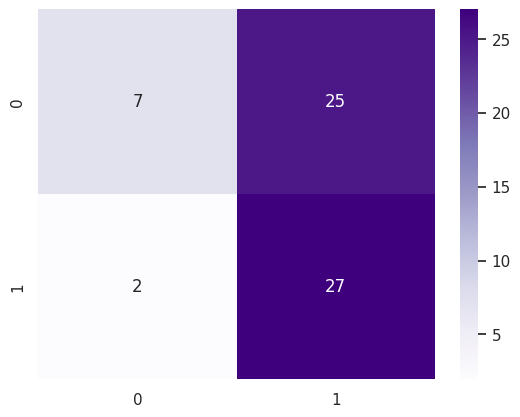

In [ ]:
cm = confusion_matrix(y_test, pred_svm)
sns.heatmap(cm, cmap='Purples', annot=True)

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(svm_model, X, y, cv =10)

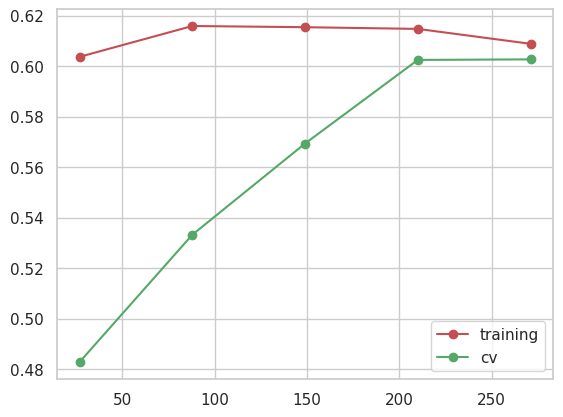

In [ ]:
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='training')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='cv')
plt.legend()

### Metric evaluation/ Model Evaluation

In [ ]:
accuracy_score(y_test, pred)
accuracy_score(y_test, pred_rf)
accuracy_score(y_test, pred_svm)

0.5573770491803278

In [ ]:
classification_report(y_test, pred)
classification_report(y_test, pred_rf)
classification_report(y_test, pred_svm)


'              precision    recall  f1-score   support\n\n           0       0.78      0.22      0.34        32\n           1       0.52      0.93      0.67        29\n\n    accuracy                           0.56        61\n   macro avg       0.65      0.57      0.50        61\nweighted avg       0.65      0.56      0.50        61\n'

In [ ]:
acc_knn = accuracy_score(y_test, pred)
acc_rf = accuracy_score(y_test, pred_rf)
acc_svm = accuracy_score(y_test, pred_svm)

prc_knn = precision_score(y_test, pred)
prc_rf = precision_score(y_test, pred_rf)
prc_svm = precision_score(y_test, pred_svm)

rec_knn = recall_score(y_test, pred)
rec_rf = recall_score(y_test, pred_rf)
rec_svm = recall_score(y_test, pred_svm)

f1_knn = f1_score(y_test, pred)
f1_rf = f1_score(y_test, pred_rf)
f1_svm = f1_score(y_test, pred_svm)

In [ ]:
model_df = pd.DataFrame({
    "name_model":["KNN", "RF", "SVM"],
    "acc":[acc_knn, acc_rf, acc_svm],
    "precision":[prc_knn, prc_rf, prc_svm],
    "recall":[rec_knn, rec_rf, rec_svm],
    "f1":[f1_knn, f1_rf, f1_svm]
})
model_df

,name_model,acc,precision,recall,f1
0,KNN,0.557377,0.525000,0.724138,0.608696
1,RF,0.819672,0.764706,0.896552,0.825397
2,SVM,0.557377,0.519231,0.931034,0.666667


**Penjelasan Model Evaluation**

1. K-Nearest Neighbors (KNN) dipilih karena kemampuannya yang sederahan dan mudah dimengerti, tidak memerlukan asumsi tertentu tentang distribusi data, kesimpulan dari penerapan KNN model:

  * KNN model memiliki akurasi sebesar 55%
  * Precision, recall, dan F1-score KNN sebesar 52%, 72%, dan 60% secara berturut-turut.
  * Peforma KNN di dataset saya cenderung rendah

2. RandomForrest atau RF dipilih karena kemampuanya dalam menangani data yang besar dan kompleks, tidak sensitif terhadap overfitting, mampu menangani fitur kategorikal maupun numerikal tanpa prepocessing yang rumit, berikut kesimpulan dari penerapan RF model:
  * Memiliki akurasi sebesar 81.96% atau 82%, merupakan tertinggi dari 3 model yang diterapkan
  * Precision, recall, F1 score sebesar 76%, 89%, dan 82% secara berturut turut
  * RF menunjukkan peforma yang baik dalam memprediksi kelas

3. Support Ventor Machine atau SVM dipilih karena kemampuanya dalam memisahkan kelas dengan margin yang maksimum, memiliki berbagai fungsi kernel yang dapat menagangi berbagai bentuk keputusan, berikut kesimpulan dari penerapan SVM:
  * SVM model memiliki akurasi sebesar 55%
  * Precision, recall, dan F1 score SVM sebesar 51%, 93%, dan 66% secara berturut-turut
  *peforma SVM cukup baik dalam recall namun rendah dalam akurasi dibandingkan RF

### Menerapkan Cross Validation basic



##### K-fold

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
k_folds = KFold (n_splits=5)

scores = cross_val_score (rf, X, y,cv = k_folds)

In [ ]:
scores

array([0.73770492, 0.80327869, 0.9       , 0.75      , 0.75      ])

In [ ]:
print("% 0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

 0.79 accuracy with a standard deviation of 0.06


In [ ]:
scores.mean()

0.7881967213114753

In [ ]:
scores.std()

0.06032385945336752

### Penjelasan hasil Cross Validation



Dengan menggunakna metode K-Flod Cross Validation, berikut evaluasi model Random Forest (RF) yang dilakukan pada dataset ini:
1. Rata-rata akurasi sebesar 79%. hal ini menujukkan bahwa secara keseluruhan model mampu memprediksi dengan benar sekitar 79% dari data yang berikan selama proses validasi silang.
2. Standar Deviasi Akuras sebesar 6% atau. Standar deviasi mengukur seberapa jauh hasil pengukuran tersebar dari rata-rata. Semakin rendah standar deviasi semkin seidkit variasi dalam hasil pengukuran.
3. Hasil Cross-Validation:
Hasil dari setiap fold dalam cross-validation adalah sebagai berikut:

  * Fold 1: Akurasi 73%
  * Fold 2: Akurasi 80%
  * Fold 3: Akurasi 90%
  * Fold 4: Akurasi 75%
  * Fold 5: Akurasi 75%
  
Terdapat variasi dalam akurasi antara fold-fold individu. Misalnya, fold ketiga memiliki akurasi yang cukup tinggi (90%), sementara fold keempat memiliki akurasi yang lebih rendah (75%). Variasi ini mungkin disebabkan oleh perbedaan dalam komposisi data yang dijadikan sebagai setiap fold.

dapat ditarik kesimpulan bahwa model Random Forest secara keseluruhan memberikan prediksi yang akurat dengan tingkat konsistensi yang baik, meskipun terdapat sedikit variasi dalam akurasi antara fold-fold individu.

Dengan demikian, model Random Forest yang dievaluasi menggunakan K-Fold Cross Validation pada dataset ini dapat dianggap memiliki kinerja yang baik, dengan kemampuan yang relatif konsisten dalam memprediksi label target.

### Menerapkan learning curves


In [ ]:
from sklearn.model_selection import learning_curve


In [ ]:
def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model, X=X, y=y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='orange', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='orange')
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.title(f'Learning Curve for {model_name}')

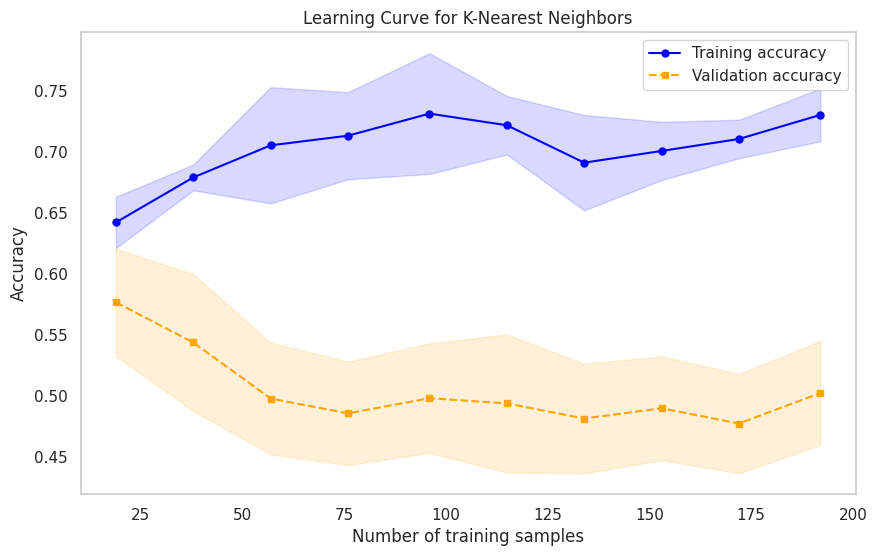

In [ ]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
plot_learning_curve(knn_model, X_train, y_train, 'K-Nearest Neighbors')

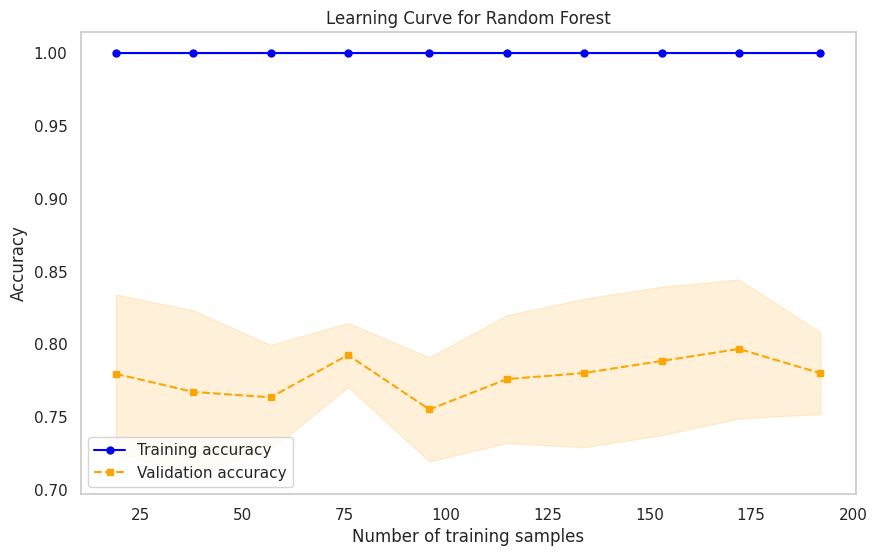

In [ ]:
# Random Forest
rf_model = RandomForestClassifier()
plot_learning_curve(rf_model, X_train, y_train, 'Random Forest')

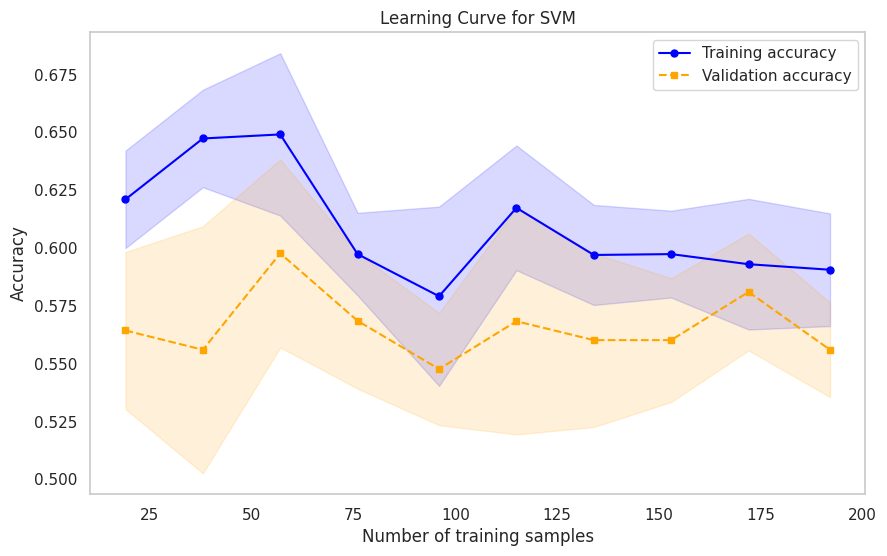

In [ ]:
# SVM
svm_model = SVC()
plot_learning_curve(svm_model, X_train, y_train, 'SVM')

### Menjelaskan Hasil dari Visualisasi Learning Curves

###### Visualisasi Learning Curves KNN

Berikut penjelasan Visualiasi Learning Curve KNN:

* Training Accuracy (biru): dimulai sekitar 0.65 dan meningkat hingga sekitar 0.75. ini berarti model semakin baik dalam mempelajari dan memprediksi data pelatihan.

* Validation Accuracy (kuning): dimulai sekitar 0.60 dan menurun menjadi antara 0.55 sampai 0.50. jika akurasi validasi jauh lebih rendah daripada akurasi pelatihan, ini bisa menjadi tanda bahwa model kita overfitting, yaitu model terlalu spesifik pada data pelatihan dan kurang mampu memprediksi data baru.

* Area Berwarna: di sekitar garis pada grafik menunjukkan varians dari hasil; semakin lebar area ini, semakin tinggi variansnya. Varians tinggi dapat menunjukkan bahwa model mungkin tidak konsisten dalam prediksinya. Dalam konteks ini, area berwarna biru menunjukkan varians untuk akurasi pelatihan, dan area berwarna kuning menunjukkan varians untuk akurasi validasi.


###### Visualisasi Learning Curves RF


berikut penjelasan detail dari visualisasi learning curves model Random Forest:

* Training Accuracy (garis biru): Di awal, akurasi sangat tinggi, yaitu 1.00 ketika jumlah sampel pelatihan 25. dapat dikatakan bahwa model bekerja dengan sangat baik pada data latih pada tahap awal. Akurasi ini tetap konstan di 1.00 atau 100% sepanjang proses pelatihan.
* Validation Accuracy (garis kuning): Di awal, akurasi validasi rendah, yaitu sekitar 0.75 ketika jumlah sampel pelatihan 25. artinya model tidak bekerja dengan baik pada data yang belum pernah dilihat sebelumnya pada tahap awal. Namun, seiring bertambahnya jumlah sampel pelatihan, akurasi validasi meningkat secara signifikan dan stabil di sekitar 0.85 atau 85% ketika jumlah sampel pelatihan mencapai 200.
* Area Berwarna: di sekitar garis pada grafik menunjukkan varians dari hasil; semakin lebar area ini, semakin tinggi variansnya. Varians tinggi dapat menunjukkan bahwa model mungkin tidak konsisten dalam prediksinya. Dalam konteks ini,area berwarna kuning menunjukkan varians untuk akurasi validasi.


###### Visualisasi Learning Curves SVM

berikut penjelasan detail dari visualisasi learning curves model Support Vector Machine (SVM)
1. Training Accuracy (garis biru): menunjukkan seberapa baik model bekerja pada data pelatihan. Di awal, akurasi sangat tinggi, yaitu sekitar 0.625. Ini menunjukkan bahwa model bekerja dengan sangat baik pada data latih pada tahap awal. Namun, seiring bertambahnya jumlah sampel pelatihan, akurasi pelatihan menurun sedikit dan stabil di sekitar 0.600 atau 60% ketika jumlah sampel pelatihan mencapai 200.

2. Validation Accuracy  (garis kuning): menunjukkan seberapa baik model bekerja pada data yang belum pernah dilihat sebelumnya. Di awal, akurasi validasi rendah, yaitu sekitar 0.575. Ini menunjukkan bahwa model tidak bekerja dengan baik pada data yang belum pernah dilihat sebelumnya pada tahap awal. Namun, seiring bertambahnya jumlah sampel pelatihan, akurasi validasi menurun sedikit

3. **Varians (area berwarna)**: Area berwarna mengelilingi kedua kurva merepresentasikan varians atau ketidakpastian dari estimasi akurasi. Varians ini menunjukkan seberapa konsisten hasil yang diperoleh model. Semakin lebar area, semakin tinggi varians. Dalam konteks ini, area berwarna biru menunjukkan varians untuk akurasi pelatihan, dan area berwarna kuning menunjukkan varians untuk akurasi validasi.



### Menggunakan hyperparameter tuning dan juga bootstrapping, jika ada.

#### hyperparameter tuning

##### K-Nearest Neighbor (KNN)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn_param = {
    "n_neighbors":[3, 5, 7, 9],
    "weights":["uniform", "distance"],
    "metric":["euclidean","manhattan"]
}

In [ ]:
knn_grids = GridSearchCV(knn, knn_param)

In [ ]:
knn_grids.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [ ]:
knn_grids.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

In [ ]:
knn_grids.best_score_

0.6060374149659864

##### Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param = {
    "n_estimators":[10,50,100,150,200],
    "criterion":["gini", "entropy", "log_loss"],
    "max_depth":[5,10,15]
}

In [ ]:
clf = GridSearchCV(rf, param)

In [ ]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15],
                         'n_estimators': [10, 50, 100, 150, 200]})

In [ ]:
clf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=50)

In [ ]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 50}

In [ ]:
clf.best_score_

0.805017006802721

In [ ]:
rf_ = RandomForestClassifier(criterion="entropy", n_estimators=50)
rf_.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [ ]:
rf_pred_ = rf_.predict(X_test)

In [ ]:
print(classification_report(y_test, rf_pred_))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79        32
           1       0.74      0.90      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



##### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
param = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svm = SVC()
clf_svm = GridSearchCV(svm, param)

In [ ]:
clf_svm.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [ ]:
clf_svm.best_score_

0.7758503401360544

In [ ]:
clf_svm.best_params_

{'C': 10, 'kernel': 'linear'}

In [ ]:
svm_ = SVC(C=10, kernel="rbf")
svm_.fit(X_train, y_train)

pred_svm = svm_.predict(X_test)

In [ ]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.70      0.44      0.54        32
           1       0.56      0.79      0.66        29

    accuracy                           0.61        61
   macro avg       0.63      0.62      0.60        61
weighted avg       0.63      0.61      0.59        61



#### Boostraping

##### KNN

In [ ]:
from sklearn.utils import resample

In [ ]:
# Bootstraping untuk KNN
knn_bootstrap = []
for _ in range(10):
    X_boot, y_boot = resample(X_train, y_train)
    knn = KNeighborsClassifier()
    knn.fit(X_boot, y_boot)
    knn_bootstrap.append(knn)

##### SVM

In [ ]:
svm_bootstrap = []
for _ in range(10):
    X_boot, y_boot = resample(X_train, y_train)
    svm = SVC()
    svm.fit(X_boot, y_boot)
    svm_bootstrap.append(svm)

In [ ]:
def evaluate_model(model, X_test, y_test):
    accuracy = []
    for clf in model:
        accuracy.append(clf.score(X_test, y_test))
    return accuracy

In [ ]:
#evaluasi KNN
knn_accuracy = evaluate_model(knn_bootstrap, X_test, y_test)
knn_accuracy

[0.5901639344262295,
 0.5901639344262295,
 0.5409836065573771,
 0.5573770491803278,
 0.5245901639344263,
 0.5737704918032787,
 0.5081967213114754,
 0.5409836065573771,
 0.5245901639344263,
 0.5573770491803278]

In [ ]:
#evaluasi SVM
svm_accuracy = evaluate_model(svm_bootstrap, X_test, y_test)

In [ ]:
svm_accuracy

[0.47540983606557374,
 0.6229508196721312,
 0.5737704918032787,
 0.47540983606557374,
 0.47540983606557374,
 0.5573770491803278,
 0.4918032786885246,
 0.47540983606557374,
 0.5901639344262295,
 0.5245901639344263]